## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

In [2]:
full = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
full.shape

(1460, 81)

In [4]:
pd.options.display.max_columns = None

In [5]:
full.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


List of categorical variables:

- MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, Electrical, PavedDrive, MiscFeature, SaleType, SaleCondition

List of numerical variables:

- LotFrontage, LotArea, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold

List of ordinal variables:

- OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, Fireplaces, Fireplaces, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence

### Exploring Target Variable - Sale Price

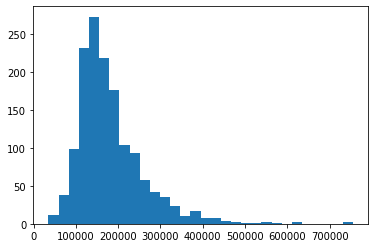

In [6]:
plt.hist(full.SalePrice, bins = 30)
plt.savefig('./images/hist_saleprice.png', dpi=500)

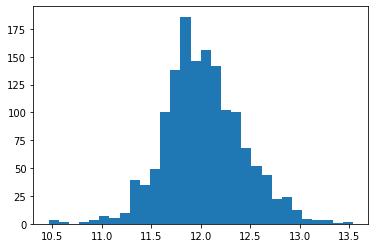

In [7]:
plt.hist(np.log(full.SalePrice), bins = 30)
plt.savefig('./images/hist_logsaleprice.png', dpi=500)

### Exploring Living Area

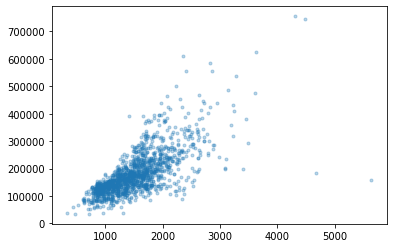

In [8]:
plt.plot(full.GrLivArea, full.SalePrice,
         '.', alpha = 0.3)
plt.savefig('./images/plot_livarea_saleprice.png', dpi=500)

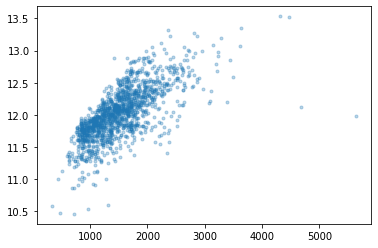

In [9]:
plt.plot(full.GrLivArea, np.log(full.SalePrice),
         '.', alpha = 0.3)
plt.savefig('./images/plot_livarea_logsaleprice.png', dpi=500)

Adding log of SalePrice to use as target in order to create a more normal distribution which helps deal with extreme values and can help some regression models have better prediction.

We also see some outliers that have very large living area but comparably low sale prices. According to the statistics professor who originally supplied the housing data, the outliers are “Partial Sales that likely don't represent actual market values” so we will exclude them.

In [10]:
full['LogSalePrice'] = np.log(full.SalePrice)
full = full[full.GrLivArea < 4500]

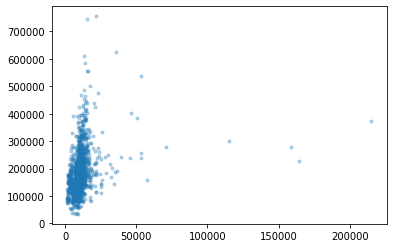

In [11]:
plt.plot(full.LotArea, full.SalePrice,
         '.', alpha = 0.3)

### Exploring Overall Quality and Overall Condition

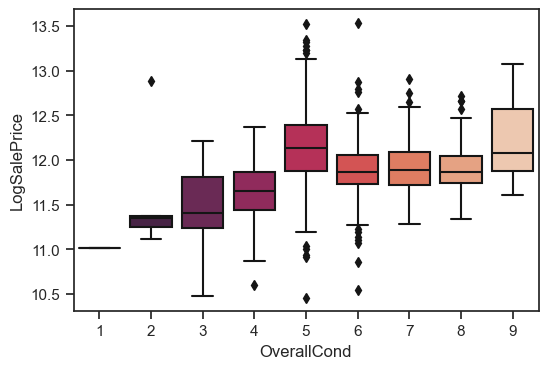

In [12]:
sns.set(rc={'figure.dpi':100})
sns.set_theme(style="ticks")
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.boxplot(data=full, x="OverallCond", y="LogSalePrice",palette="rocket")
ax.figure.savefig('./images/boxplot_condition.png', dpi=500)

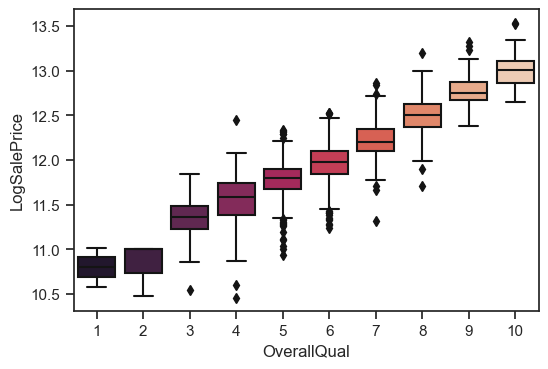

In [13]:
sns.set(rc={'figure.dpi':100})
sns.set_theme(style="ticks")
# Draw a nested violinplot and split the violins for easier comparison
ax = sns.boxplot(data=full, x="OverallQual", y="LogSalePrice",palette="rocket")
ax.figure.savefig('./images/boxplot_quality.png', dpi=500)

### Exploring Zoning Area

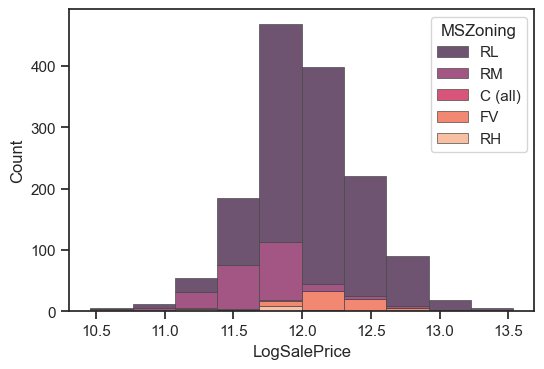

In [14]:
sns.set_theme(style="ticks")
ax = sns.histplot(
    full,
    x="LogSalePrice",
    hue="MSZoning",
    multiple="stack",
    bins=10,
    palette="rocket",
    edgecolor=".3",
    legend = True,
    linewidth=.5)
ax.figure.savefig('./images/hist_zoning.png', dpi=500)

### Exploring Bedrooms and Bathrooms

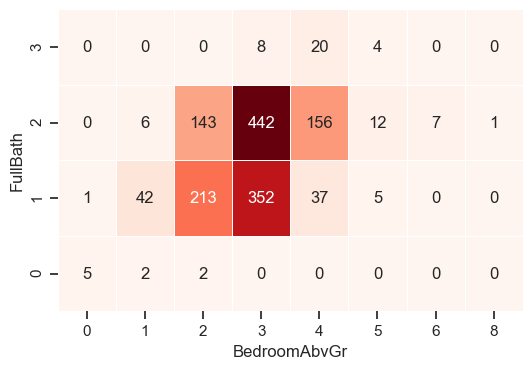

In [15]:
rooms = full.groupby(['FullBath','BedroomAbvGr']).size(
).unstack(fill_value=0).iloc[::-1]
ax = sns.heatmap(rooms, annot=True, fmt="d", linewidths=.5,cbar=None, cmap="Reds")
ax.figure.savefig('./images/bed_bath_heatmap.png', dpi=500)

### Exploring Neighborhoods

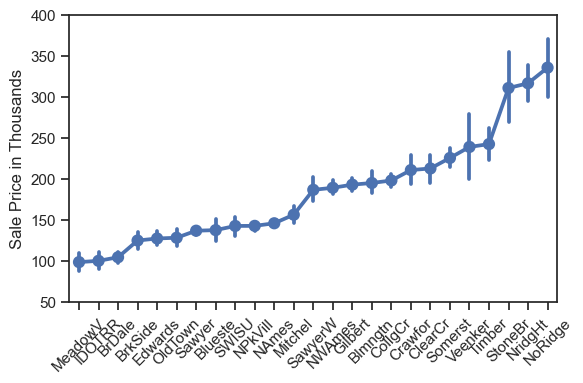

In [16]:
neight_sp_mean = full.groupby('Neighborhood')['SalePrice'].mean().sort_values()
ax = sns.pointplot(x = full.Neighborhood.values, y = full.SalePrice.values, order = neight_sp_mean.index)
plt.yticks(ax.get_yticks(), (ax.get_yticks() / 1000).astype(int))
plt.ylabel('Sale Price in Thousands')
plt.xticks(rotation=45)
plt.tight_layout()
ax.figure.savefig('./images/neighbourhoods.png', dpi=500)

## Missing Data and Imputation

Dropping the ID column which does not provide any value

In [17]:
full.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

Checking which columns have missing values and ordering them by amount

In [18]:
null_cols = full.columns[full.isnull().any()]
full_null = full[null_cols].isnull().sum().sort_values(ascending=False)
print(full_null)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [19]:
# Testing to see if there is any missing pool quality score when the pool area is larger then 0 (where there is a pool)
full[(full['PoolQC'].isna()) & (full['PoolArea'] > 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSalePrice


By looking at the data description file we can infer that most of the missing values are because the characteristic does not apply. For example, there is no pool quality score because there is no pool, as seen in the above code. In this case it will make sense to assign categorical values a new category called 'None' and numerical values '0'. This will more accurately represent this characteristic.

In [20]:
cat_feats_fillNone = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish',
                     'GarageQual', 'GarageCond','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual',
                     'MasVnrType','Electrical']
 
full[cat_feats_fillNone] = full[cat_feats_fillNone].fillna('None')

num_feats_fillzero = ['MasVnrArea', 'GarageYrBlt']

full[num_feats_fillzero] = full[num_feats_fillzero].fillna(0)

We still have one feature which has missing values, lot frontage, it would not make sense for it to be missing because all lots must have some area that is adjacent to the street. In this case there is no ideal solution, one option is to delete the columns but we would lose the information in it. Since the missing values are only 17.7% of all values we opted not to do that. The other two options are to impute them or to leave them. Leaving them would not allow some models to work so we will choose to impute them with the median value for that category.

In [21]:
full['LotFrontage'] = full['LotFrontage'].fillna(full['LotFrontage'].median())

In [22]:
null_cols = full.columns[full.isnull().any()]
full_null = full[null_cols].isnull().sum().sort_values(ascending=False)
print(full_null)

Series([], dtype: float64)


## Feature Engineering

Using domain knowledge and exploratory data analysis I have come up with some ideas of new variables to create in order to potentially enhance the predictive power of our models. This part is as much art as it is science and the possibilities are endless but we will have to make our best effort.

In [23]:
#A measure that takes into account both year built and remodeled
full['YrBltAndRemod']= full['YearBuilt'] + full['YearRemodAdd']

#A measure of total SF
full['TotalSF']= full['TotalBsmtSF'] + full['1stFlrSF'] + full['2ndFlrSF']

#A different measure of total SF
full['TotalSF2'] = full['BsmtFinSF1'] + full['BsmtFinSF2'] + full['1stFlrSF'] + full['2ndFlrSF']

#Variable with value of all bathrooms
full['Total_Bathrooms'] = (full['FullBath'] + (0.5 * full['HalfBath']) +
                           full['BsmtFullBath'] + (0.5 * full['BsmtHalfBath']))

#Variable with total porch square foot area
full['Total_porchSF'] = (full['OpenPorchSF'] + full['3SsnPorch'] + full['EnclosedPorch'] +
                         full['ScreenPorch'] +full['WoodDeckSF'])

#Binary variable for presence of certain house features
full['haspool'] = full['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
full['has2ndfloor'] = full['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
full['hasgarage'] = full['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
full['hasbsmt'] = full['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
full['hasfireplace'] = full['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [24]:
full.shape

(1458, 91)

## Dummifying

The process of dummifying will help our linear model perform correctly, although it is not strictly necessary for our tree based models. We will dummify before doing the train/test split because we don't find a risk of slippage since making dummies is not data dependent, it is just an application of a fixed transformation.

For our linear models I will try two versions: a dummified version where most ordinal categories, those that rank quality for example, will be preserved and another where all categorical variables are dummified with one hot encoding. 

In [25]:
from sklearn.preprocessing import LabelEncoder

#Doing label encoding to test on our tree models to see if we get better performance than one hot encoding method
full_le = full.copy()
columns_object = list(full_le.select_dtypes(include=['object']).columns)

for column in columns_object:
    full_le[column] = LabelEncoder().fit_transform(full_le[column])

In [26]:
#Dummifying categorical variables

full_d = pd.get_dummies(full,drop_first=True)

In [27]:
#Changing text ranking ordinal features to integer before doing one hot encoding. Also fixing one categorical variable
#that appears as numerical.
full_d2 = full.copy()

quality_scale = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0}
basement_scale = {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0}

full_d2 = full.replace({
    'MSSubClass' : {20 : 'MS20', 30 : 'MS30', 40 : 'MS40', 45 : 'MS45', 50 : 'MS50', 60 : 'MS60', 70 : 'MS70',
                   75 : 'MS75', 80 : 'MS80', 85 : 'MS85', 90 : 'MS90', 120 : 'MS120', 150 : 'MS150', 160 : 'MS160',
                   180 : 'MS180', 190 : 'MS190'},
    'ExterCond' : quality_scale,
    'BsmtQual' : quality_scale,
    'BsmtCond' : quality_scale,
    'BsmtExposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'NA' : 0},
    'BsmtFinType1' : basement_scale,
    'BsmtFinType2' : basement_scale,
    'HeatingQC' : quality_scale,
    'KitchenQual' : quality_scale,
    'FireplaceQu' : quality_scale,
    'GarageQual' : quality_scale,
    'GarageCond' : quality_scale,
    'PavedDrive' : {'Y' : 2, 'P' : 1, 'N' : 0},
    'PoolQC' : quality_scale,
})

#Converting the binary feature

full_d2['CentralAir'] = (full_d2['CentralAir'] == 'Y').astype(int)

full_d2 = pd.get_dummies(full_d2,drop_first=True)

## Train / Test Split

We will generate a train/test split for our two types of dummified dataframes

In [28]:
#Creating target variable and dropping it from full dataframe
y_le = full_le['LogSalePrice']
full_le.drop(['SalePrice', 'LogSalePrice'], inplace=True, axis=1)

y_d = full_d['LogSalePrice']
full_d.drop(['SalePrice', 'LogSalePrice'], inplace=True, axis=1)

y_d2 = full_d2['LogSalePrice']
full_d2.drop(['SalePrice', 'LogSalePrice'], inplace=True, axis=1)

In [29]:
from sklearn.model_selection import train_test_split
X_le_train, X_le_test, y_le_train, y_le_test = train_test_split(full_le, y_le, test_size=0.2, random_state=11)
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(full_d, y_d, test_size=0.2, random_state=11)
X_d2_train, X_d2_test, y_d2_train, y_d2_test = train_test_split(full_d2, y_d, test_size=0.2, random_state=11)

## Transforming Skewed Variables

In order to prevent violating some key assumptions (linearity, normality, and constant variance) we will do a transformation using the Yeo Johnsona method to make the data more Gaussian-like. Although this does not guarantee a complete fix for those violations it will likely improve them, another benefit is that it can help strengthen the linear relationship and thus its prediction capabilities. However, I must note that this could lead to more overfitting and losing interpretability.

### Dummy 1

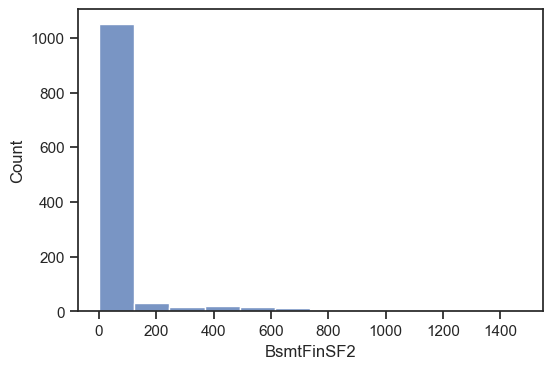

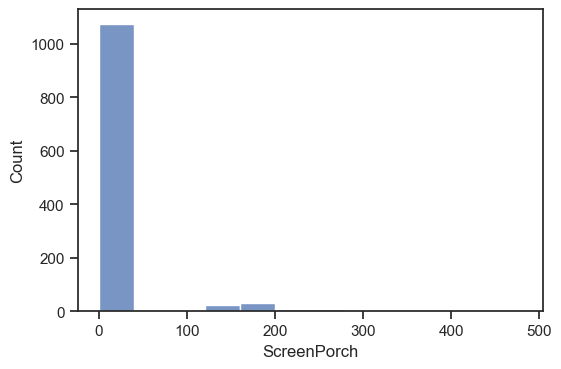

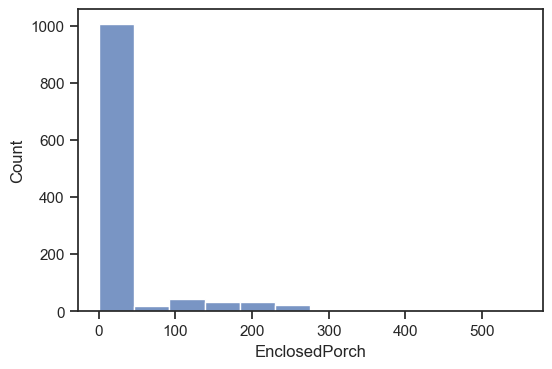

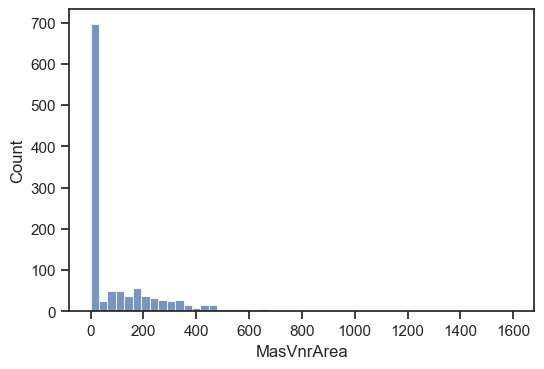

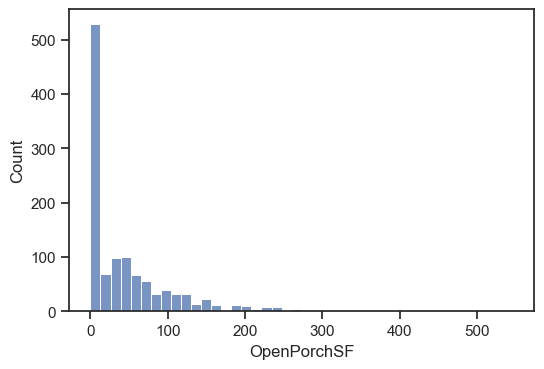

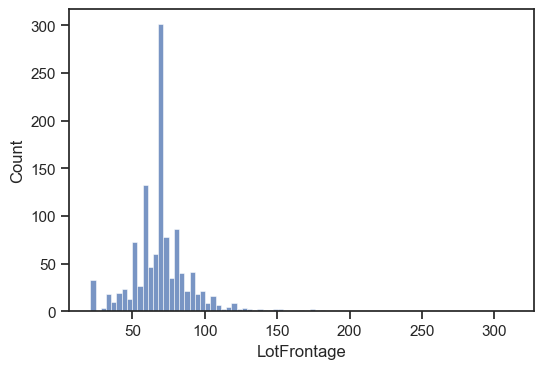

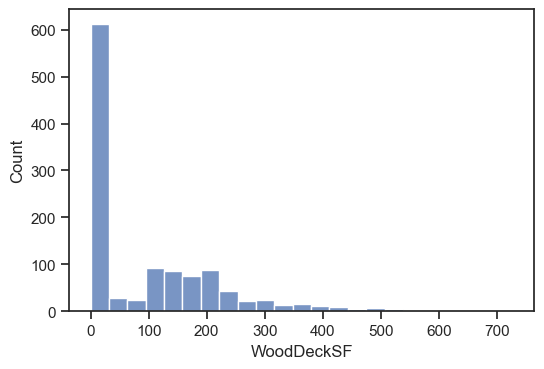

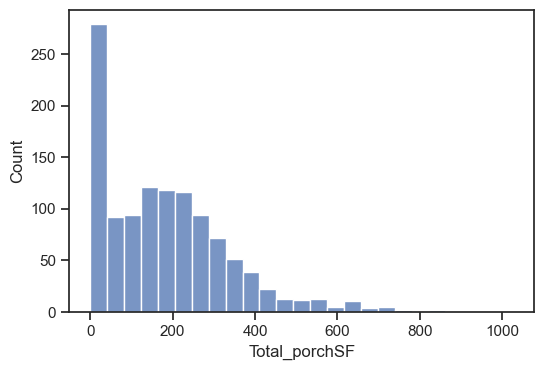

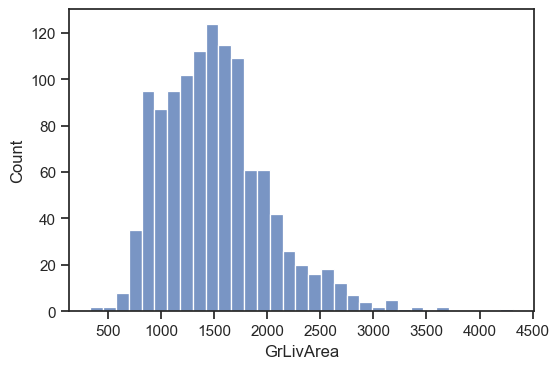

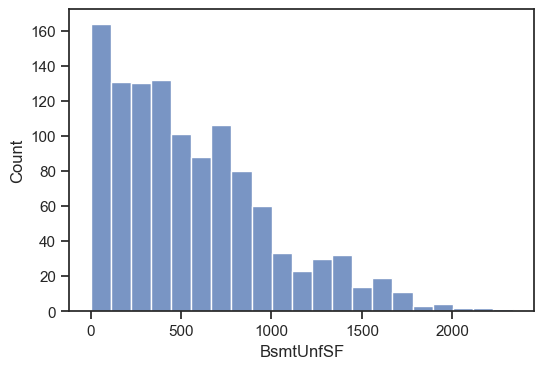

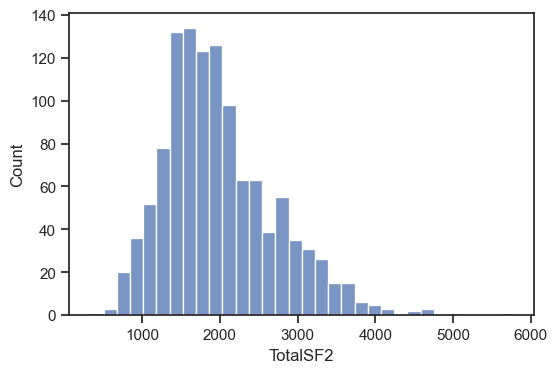

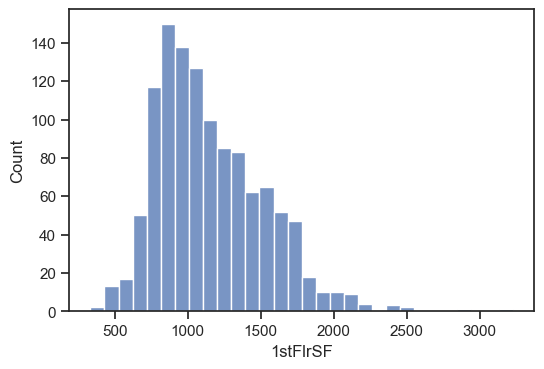

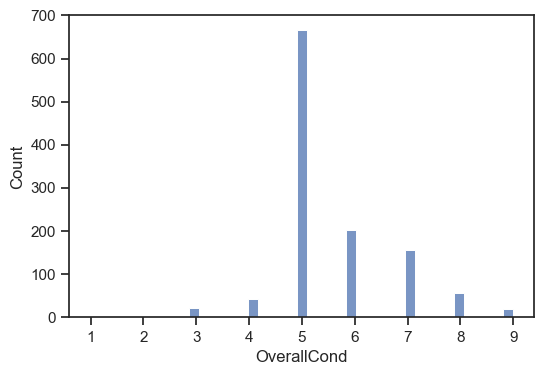

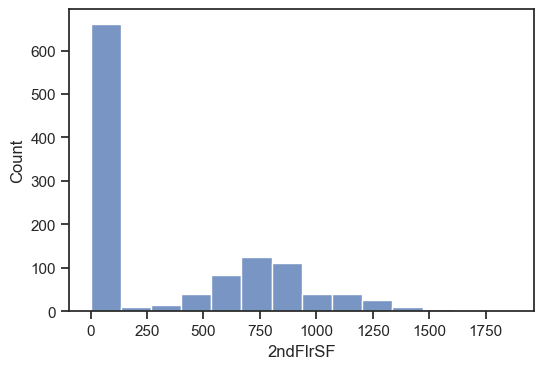

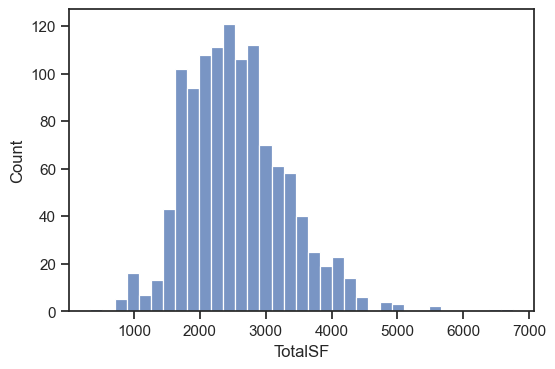

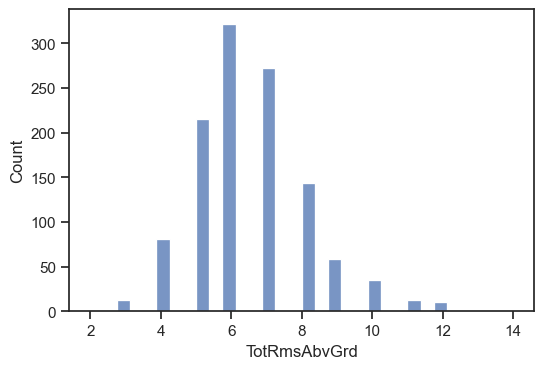

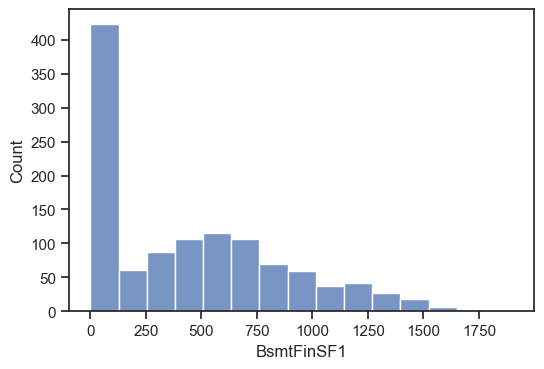

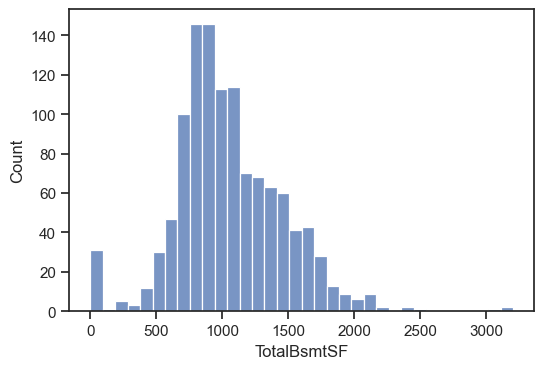

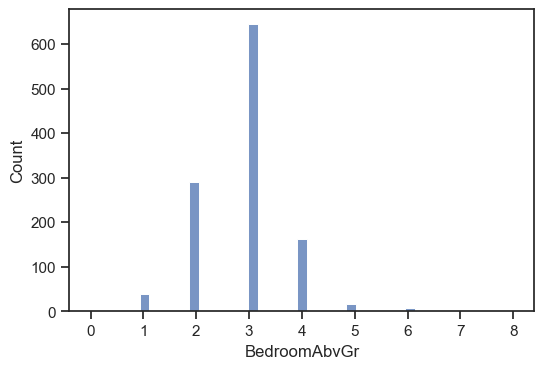

In [30]:
#Finding features with high skew and removing them unless not appropriate

from scipy.stats import skew
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X_d_train.columns:
    if X_d_train[i].dtype in numeric_dtypes:
        numerics.append(i)
skew_features = X_d_train[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.3]
skew_index = list(high_skew.index)
skew_index = [e for e in skew_index if e not in ('haspool','MSSubClass','MiscVal','PoolArea',
                                                '3SsnPorch', 'LowQualFinSF','KitchenAbvGr',
                                                'BsmtHalfBath', 'HalfBath', 'BsmtFullBath',
                                                'Fireplaces', 'LotArea')]
# skew_index
for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d_train[i])
    ax.figure.savefig('./images/Transformation/Pre/'+i+'.png', dpi=500)

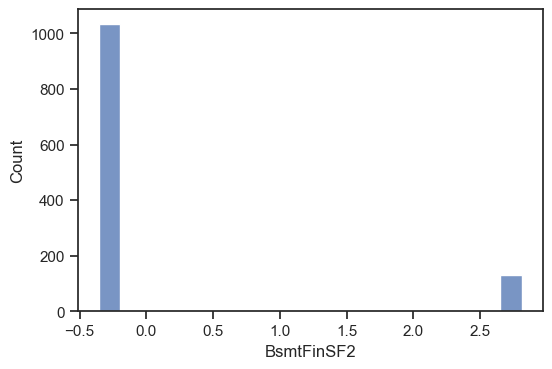

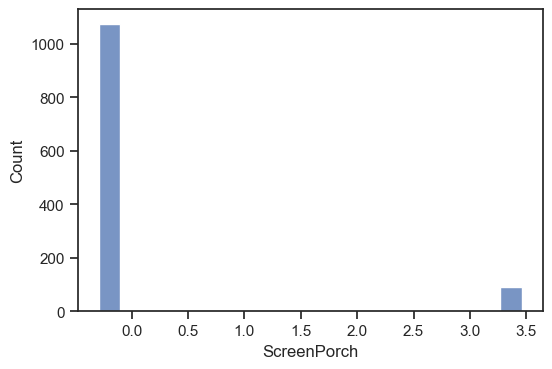

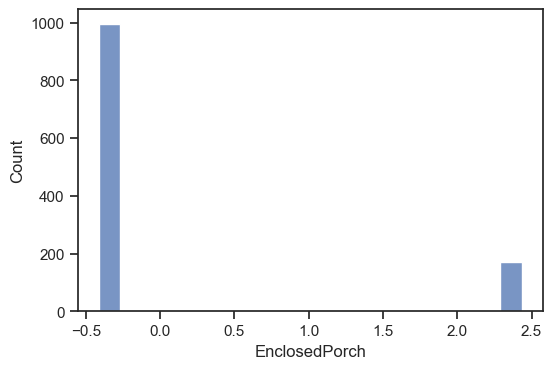

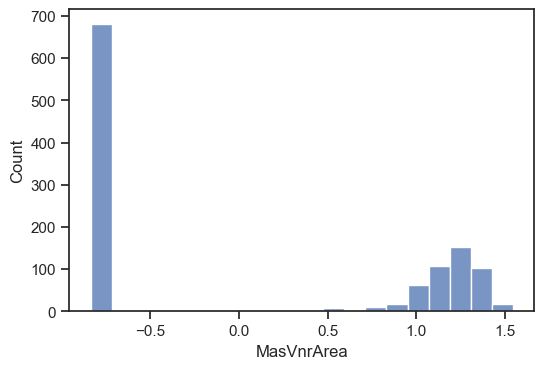

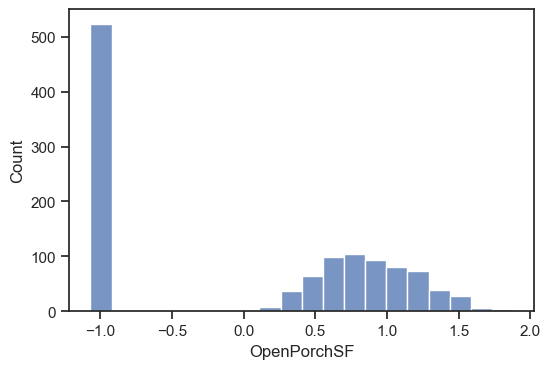

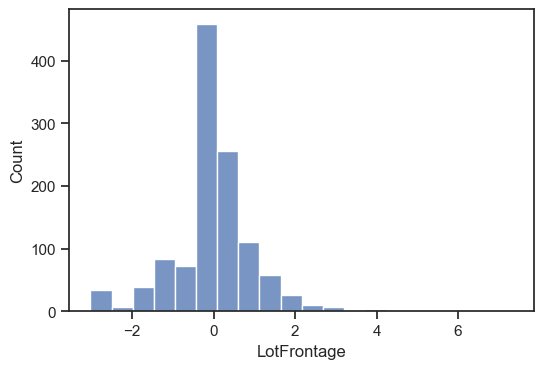

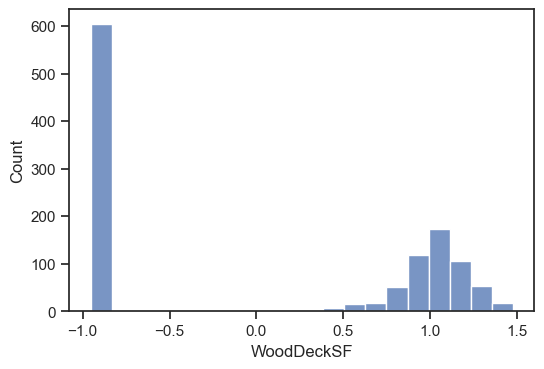

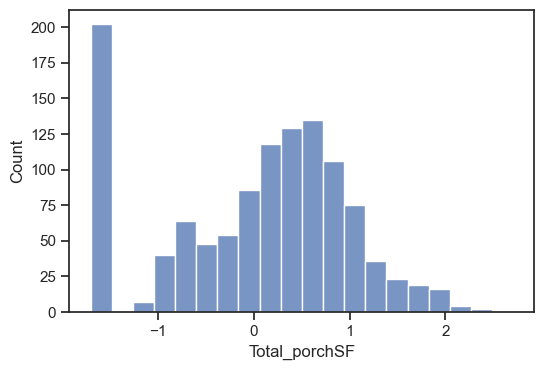

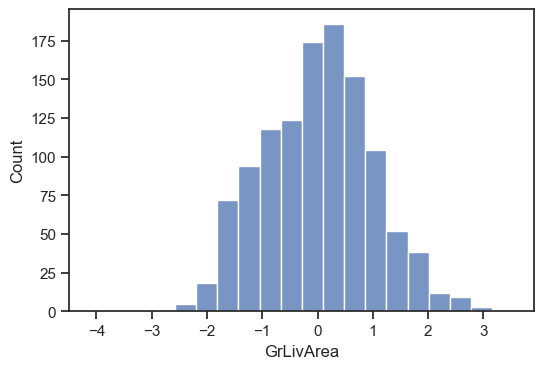

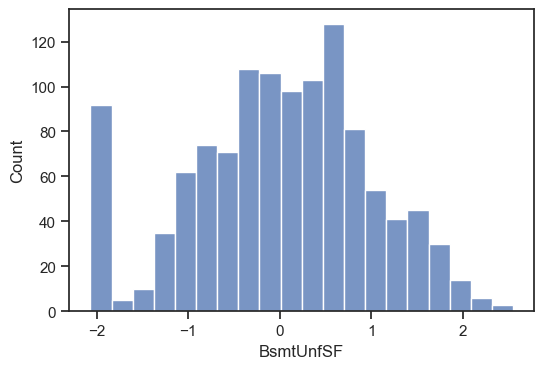

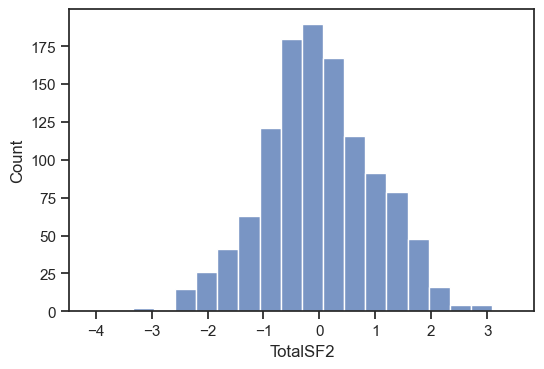

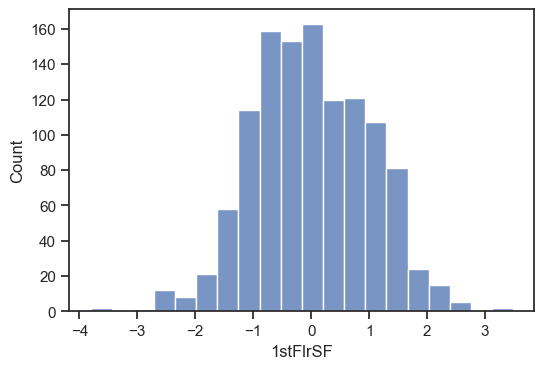

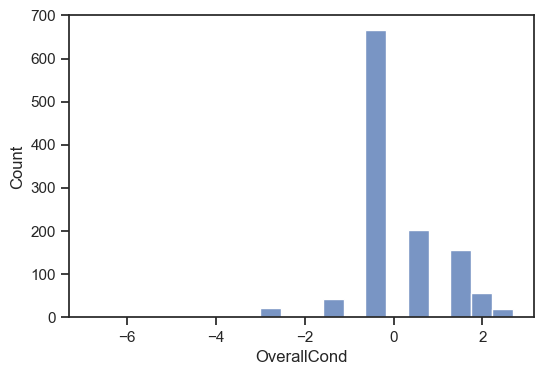

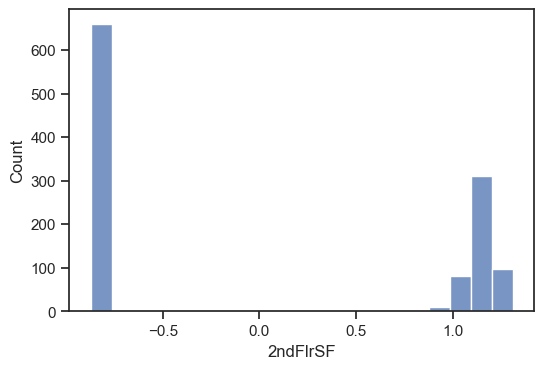

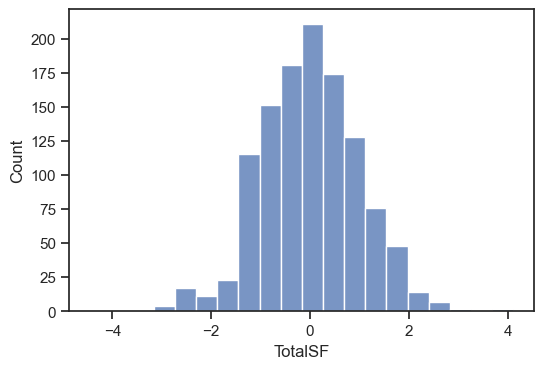

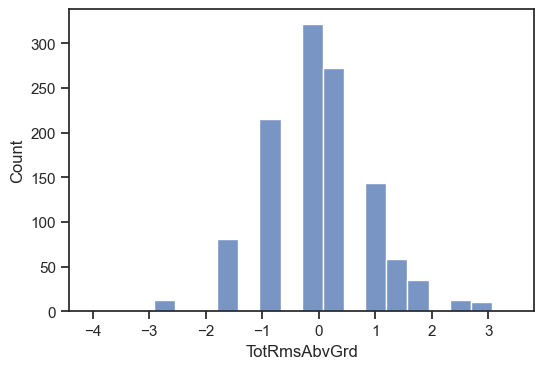

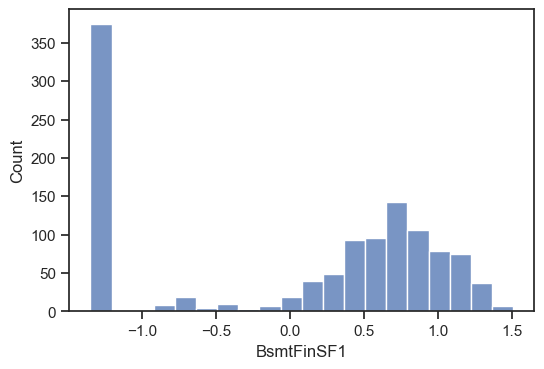

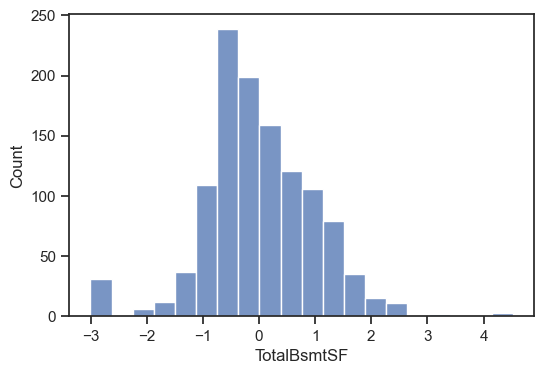

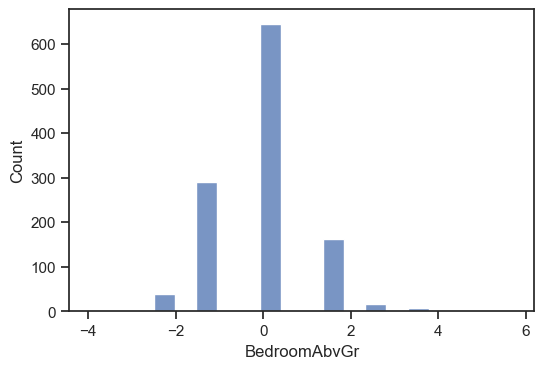

In [31]:
#Scaling features and creating new dataframe with scaled values

from sklearn.preprocessing import PowerTransformer
X_d_scaled_train = X_d_train.copy()
features = X_d_train[skew_index]
scaler = PowerTransformer(method='yeo-johnson').fit(features.values)
features = scaler.transform(features.values)
X_d_scaled_train[skew_index] = features


X_d_scaled_test = X_d_test.copy()
target = X_d_test[skew_index]
target = scaler.transform(target.values)
X_d_scaled_test[skew_index] = target

for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d_scaled_train[i], bins=20)
    ax.figure.savefig('./images/Transformation/Post/'+i+'.png', dpi=500)

### Dummy 2

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


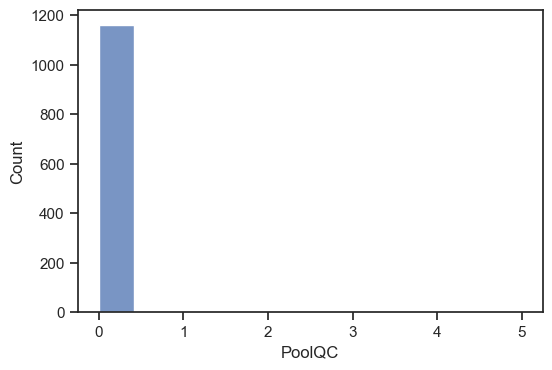

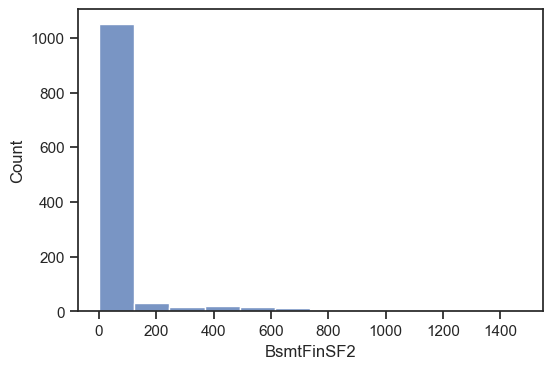

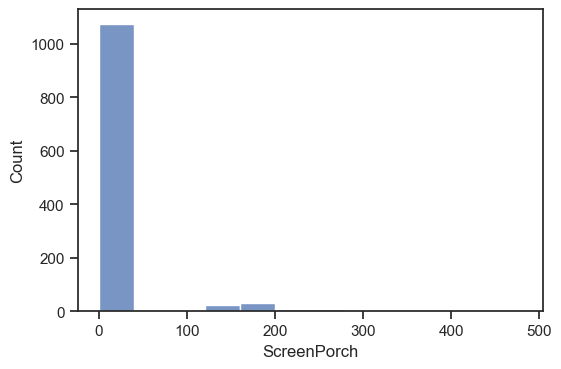

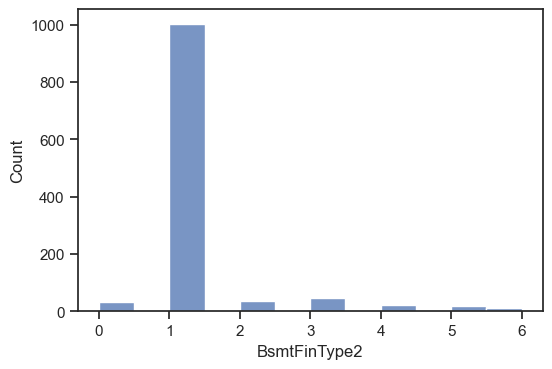

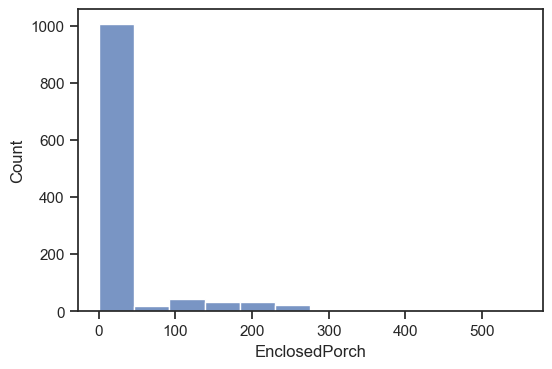

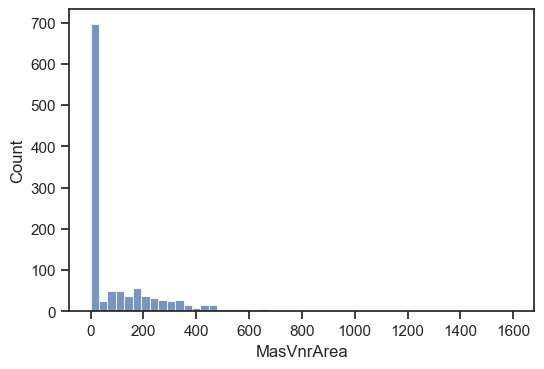

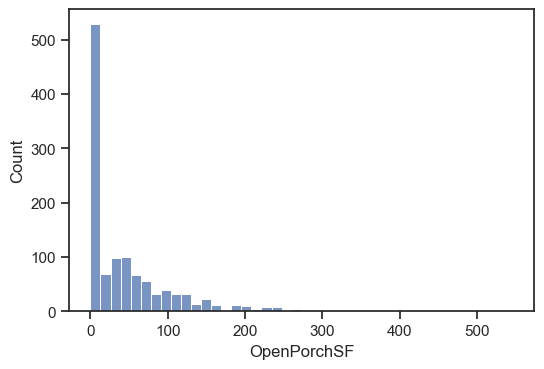

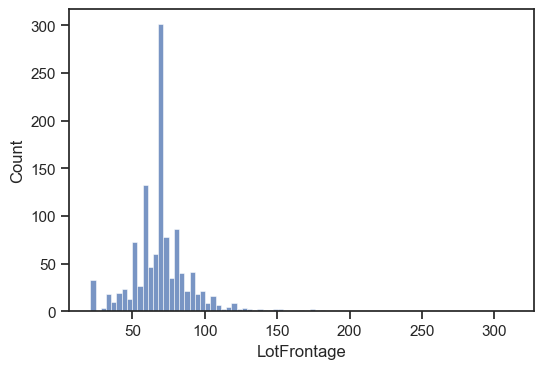

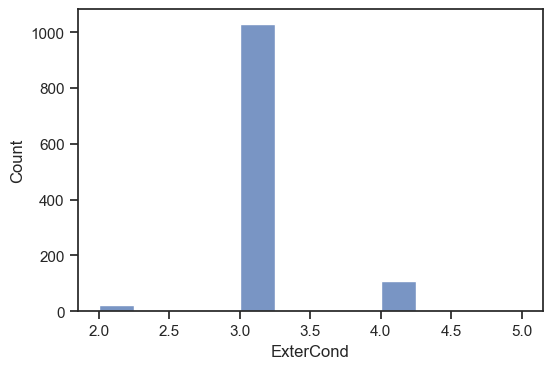

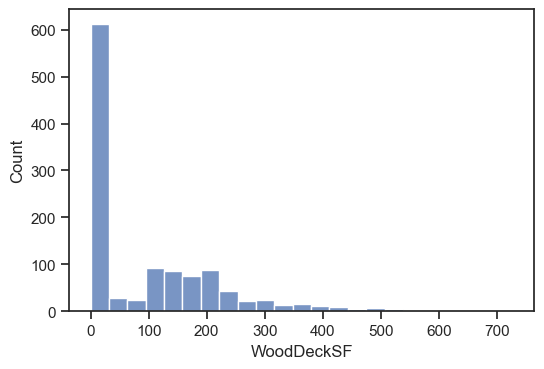

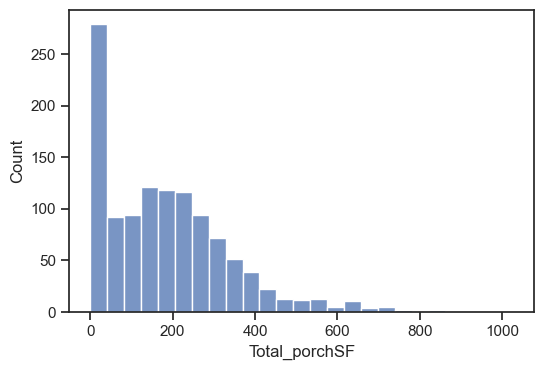

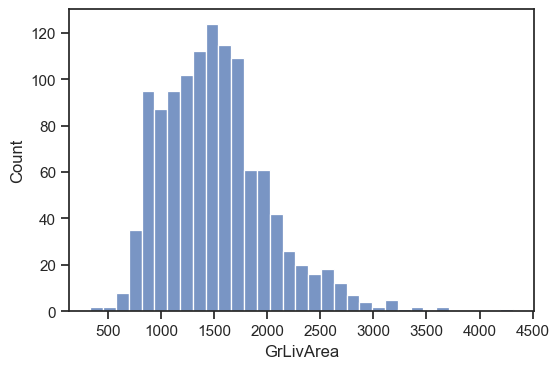

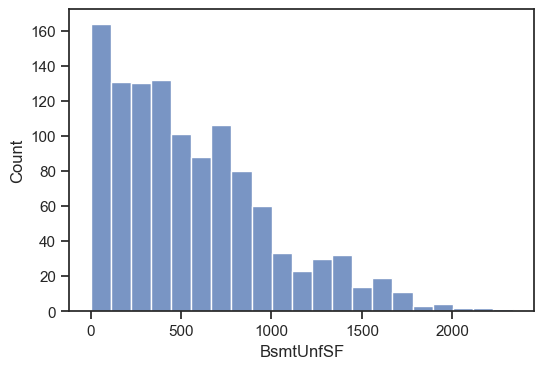

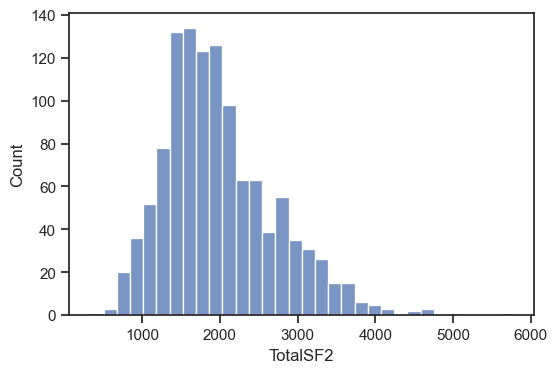

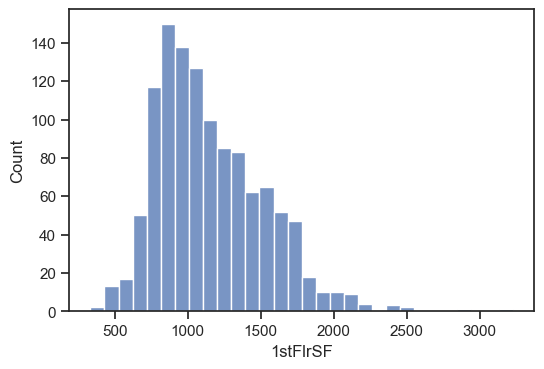

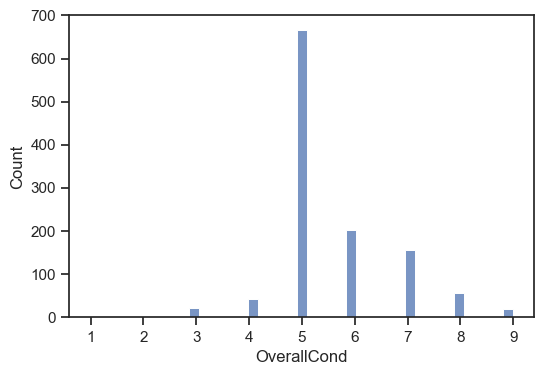

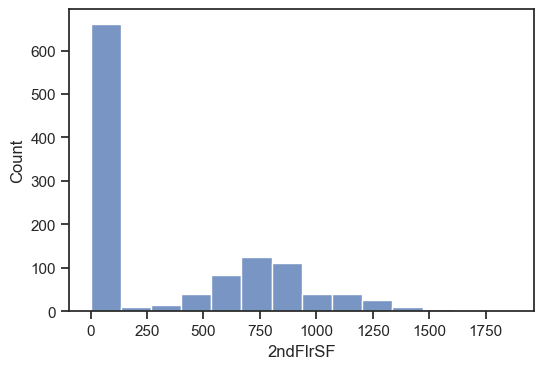

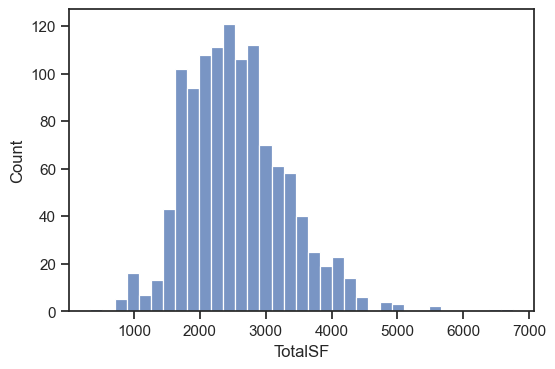

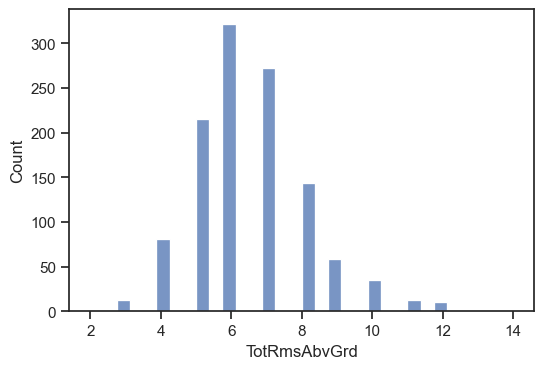

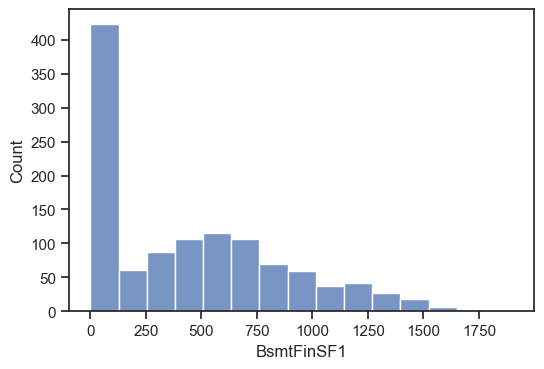

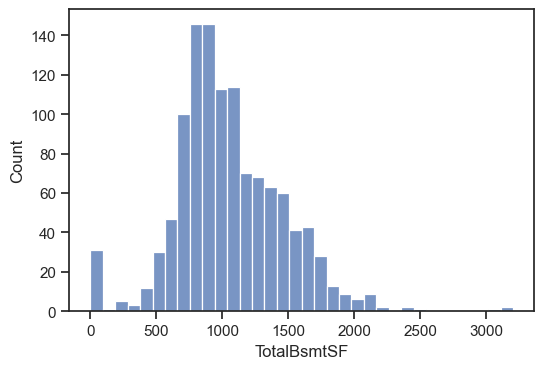

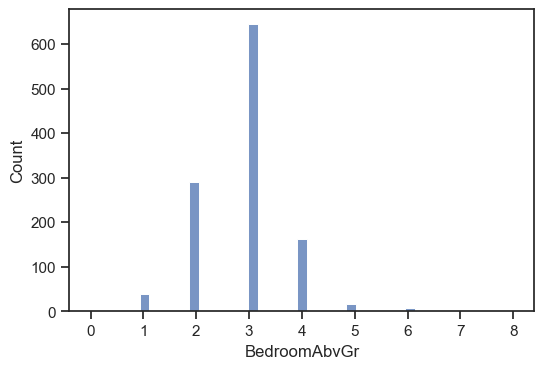

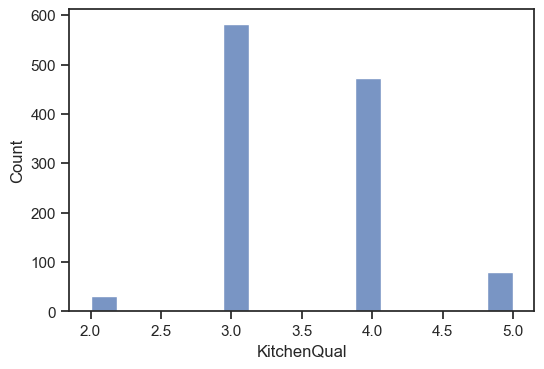

In [32]:
#Finding features with high skew and removing them unless not appropriate

from scipy.stats import skew
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in X_d2_train.columns:
    if X_d2_train[i].dtype in numeric_dtypes:
        numerics.append(i)
skew_features = X_d2_train[numerics].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.3]
skew_index = list(high_skew.index)
skew_index = [e for e in skew_index if e not in ('haspool','MSSubClass','MiscVal','PoolArea',
                                                '3SsnPorch', 'LowQualFinSF','KitchenAbvGr',
                                                'BsmtHalfBath', 'HalfBath', 'BsmtFullBath',
                                                'Fireplaces', 'LotArea')]
# skew_index
for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d2_train[i])
    ax.figure.savefig('./images/Transformation/Pre/'+i+'.png', dpi=500)

C:\Users\Daniel\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


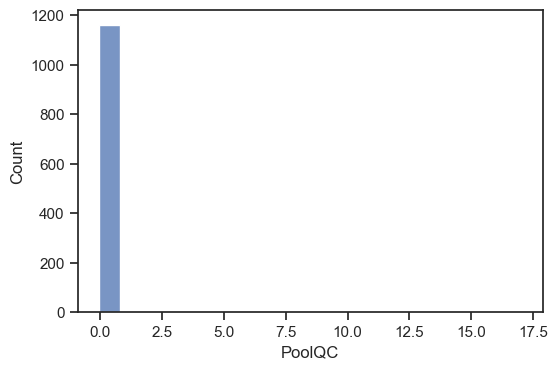

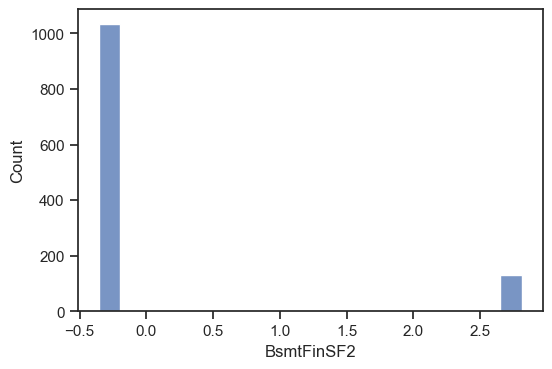

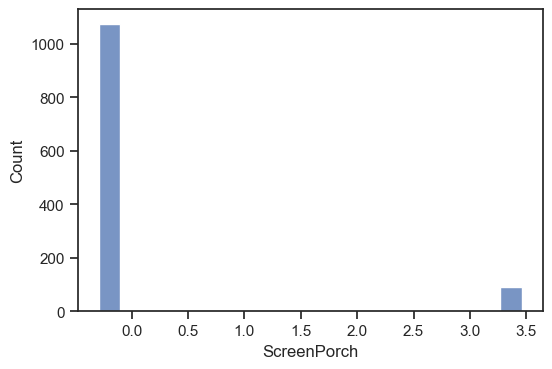

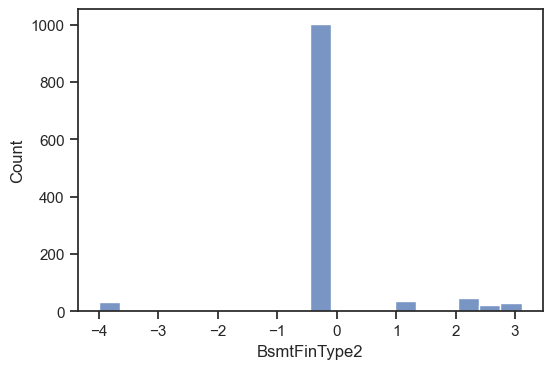

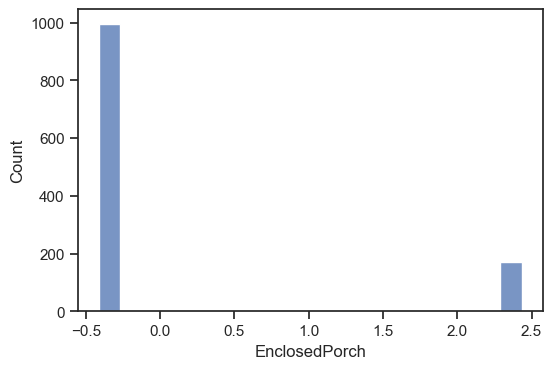

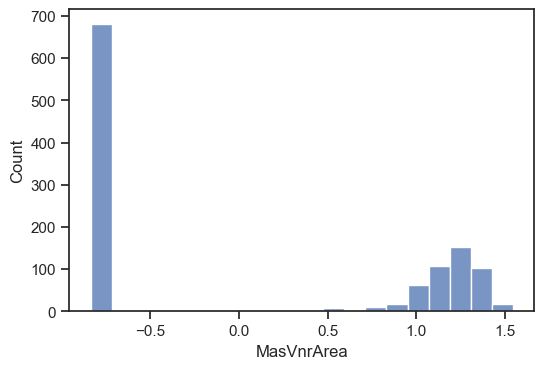

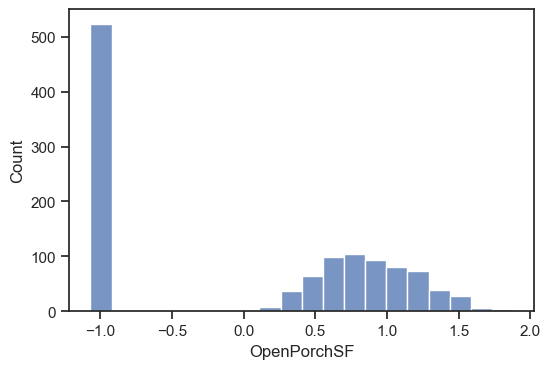

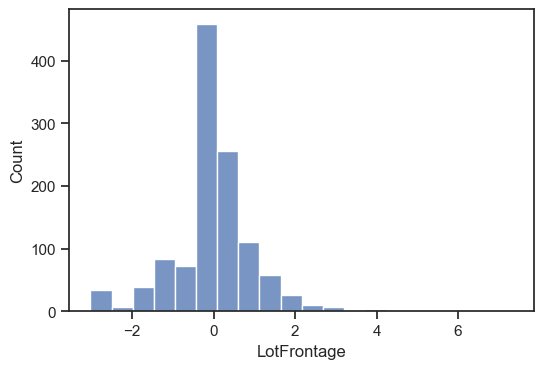

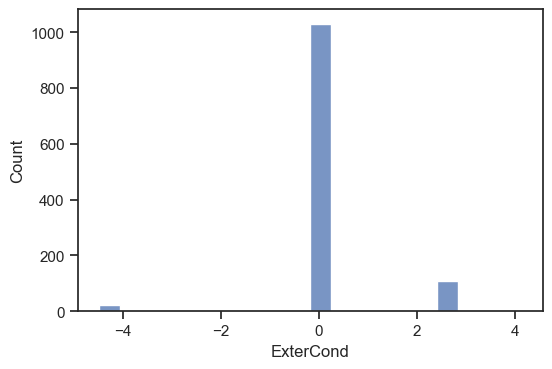

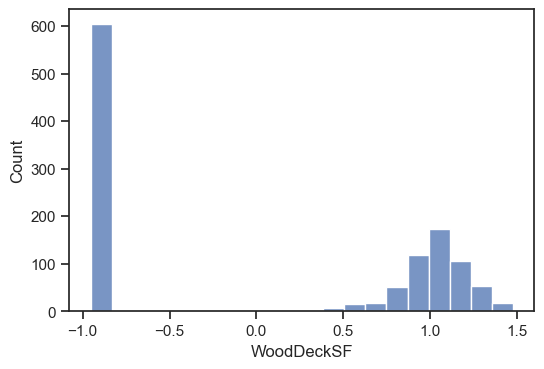

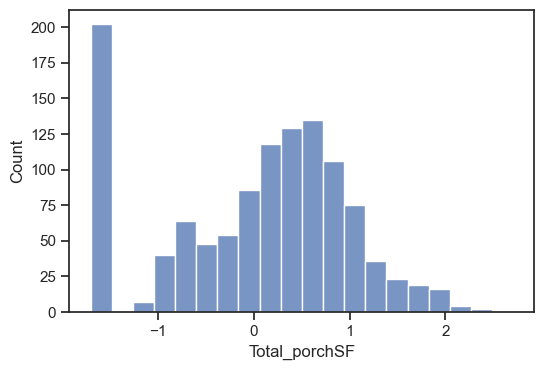

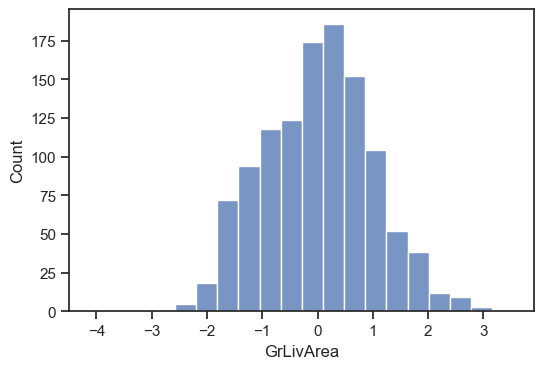

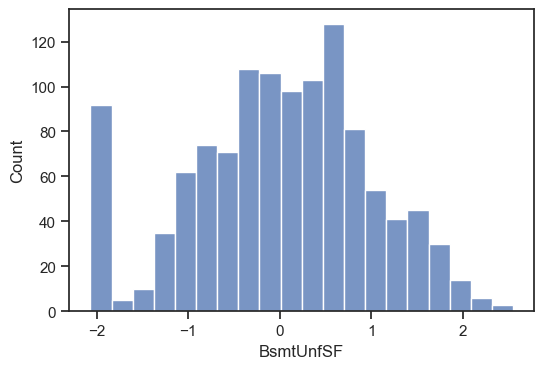

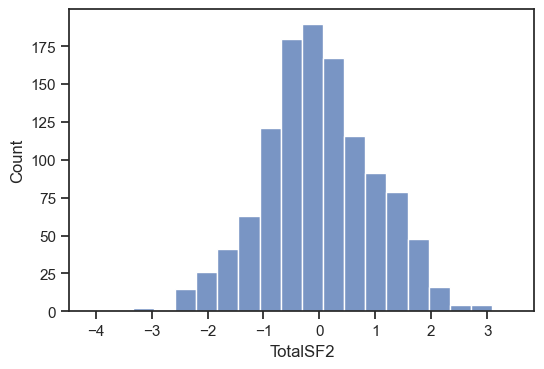

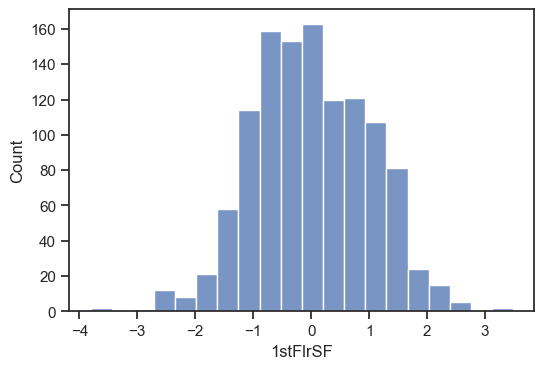

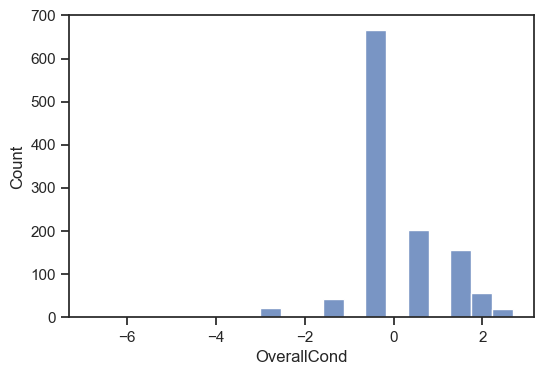

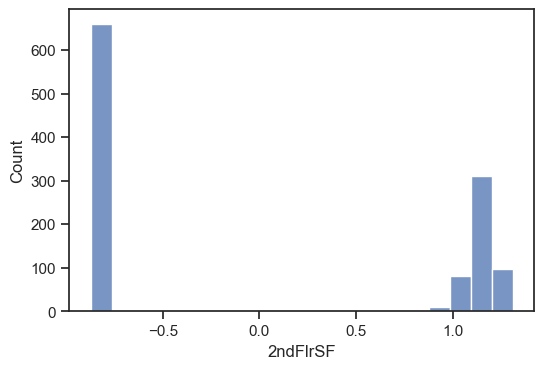

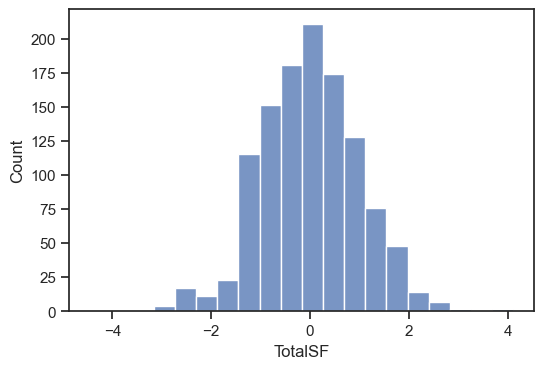

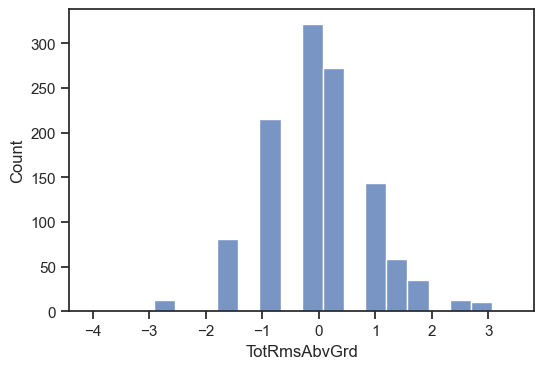

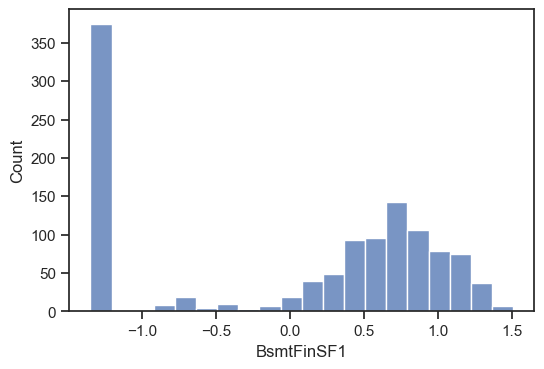

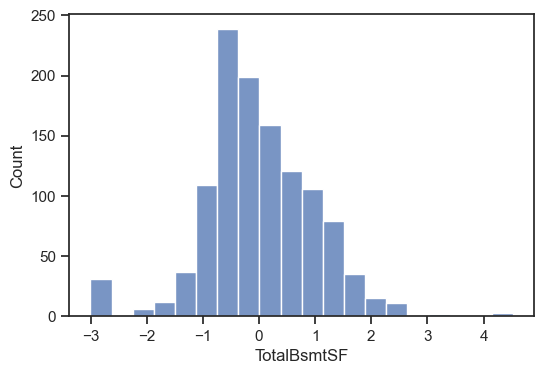

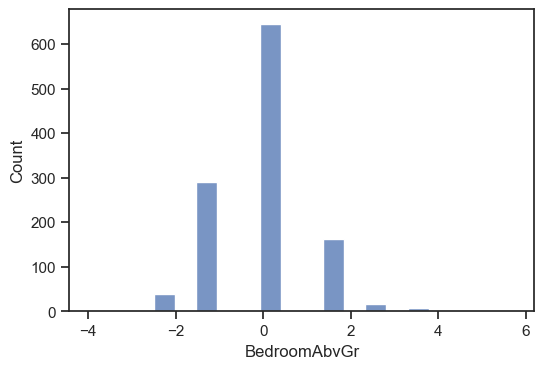

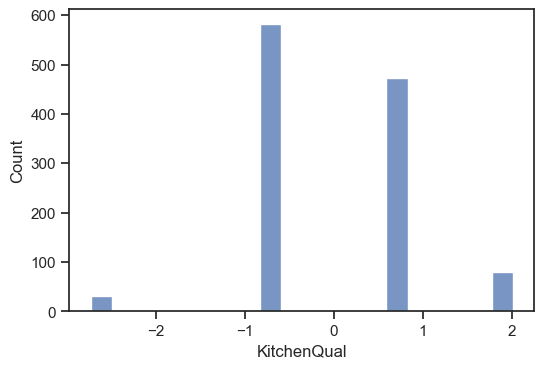

In [33]:
#Scaling features and creating new dataframe with scaled values

from sklearn.preprocessing import PowerTransformer
X_d2_scaled_train = X_d2_train.copy()
features = X_d2_train[skew_index]
scaler = PowerTransformer(method='yeo-johnson').fit(features.values)
features = scaler.transform(features.values)
X_d2_scaled_train[skew_index] = features


X_d2_scaled_test = X_d2_test.copy()
target = X_d2_test[skew_index]
target = scaler.transform(target.values)
X_d2_scaled_test[skew_index] = target

for i in skew_index:    
    fig, ax=plt.subplots()
    sns.histplot(X_d2_scaled_train[i], bins=20)
    ax.figure.savefig('./images/Transformation/Post/'+i+'.png', dpi=500)

## Modeling

In this section we will test different machine learning models and compare its results.

### Multiple Linear Regression Dummy 1

In [34]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_d_scaled_train, y_d_train)
print("R^2 for train set: %f" %ols.score(X_d_scaled_train, y_d_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_d_scaled_test, y_d_test))

R^2 for train set: 0.960031
--------------------------------------------------
R^2 for test  set: 0.871361


In [35]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(0.1,2,30)
ridge = Ridge(normalize = True)
ridge_scores_train = []
ridge_scores_test  = []

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            ridge.fit(X_d_scaled_train, y_d_train)
            ridge_scores_train.append(ridge.score(X_d_scaled_train, y_d_train))
            ridge_scores_test.append(ridge.score(X_d_scaled_test, y_d_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)

In [36]:
score_max = np.max(ridge_scores_test)
print(score_max)
index = np.where(ridge_scores_test == score_max)
alphas[index]

0.8990295717449859


array([0.29655172])

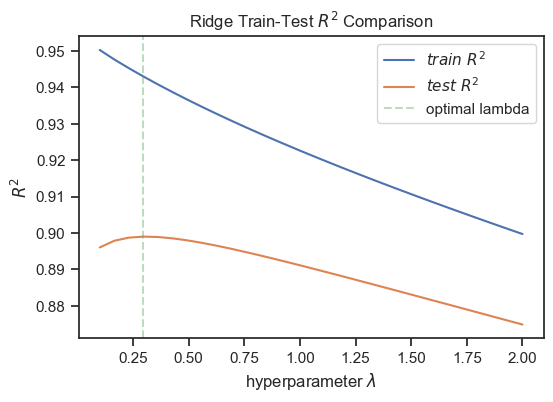

In [37]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
score_max = np.max(ridge_scores_test)
index = np.where(ridge_scores_test == score_max)
last_underfit  = alphas[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.savefig('./images/ridge.png', dpi=500)

In [38]:
alphas2 = np.linspace(0.00005,0.0010,50)
lasso = Lasso(normalize=True)
lasso_scores_train = []
lasso_scores_test  = []
for alpha in alphas2:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_d_scaled_train, y_d_train)
    lasso_scores_train.append(lasso.score(X_d_scaled_train, y_d_train))
    lasso_scores_test.append(lasso.score(X_d_scaled_test, y_d_test))

lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [39]:
score_max = np.max(lasso_scores_test)
print(score_max)
index = np.where(lasso_scores_test == score_max)
alphas2[index]

0.897569540814456


array([0.00012755])

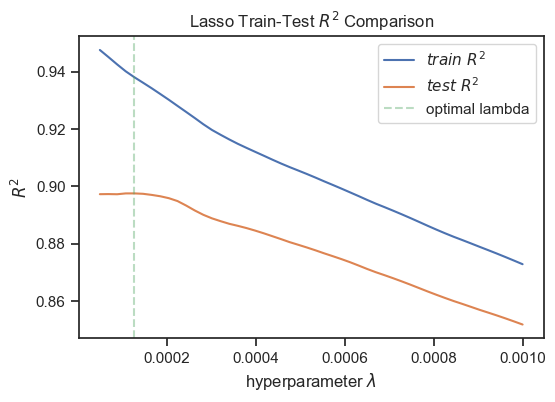

In [40]:
plt.plot(alphas2, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas2, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
score_max = np.max(lasso_scores_test)
index = np.where(lasso_scores_test == score_max)
last_underfit  = alphas2[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.savefig('./images/lasso.png', dpi=500)

[Text(0, 0.5, ''), Text(0.5, 0, 'Feature Importance')]

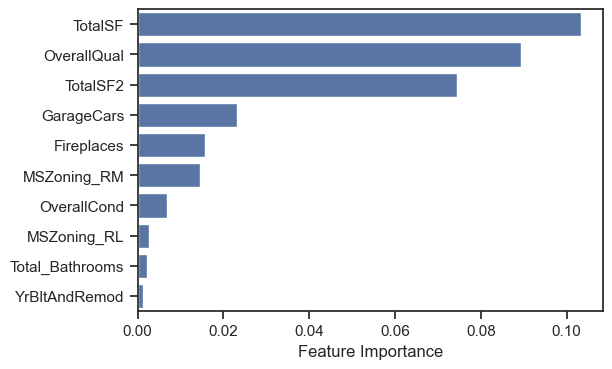

In [41]:
pd.options.display.max_rows = 30
coefficients = pd.concat([pd.DataFrame(X_d_scaled_train.columns),
                          pd.DataFrame(np.transpose(abs(lasso.coef_)))], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:10], color="b")
ax.set(ylabel="",
       xlabel="Feature Importance")

### Multiple Linear Regression Dummy 2

In [42]:
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_d2_scaled_train, y_d2_train)
print("R^2 for train set: %f" %ols.score(X_d2_scaled_train, y_d2_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_d2_scaled_test, y_d2_test))

R^2 for train set: 0.957867
--------------------------------------------------
R^2 for test  set: 0.864103


In [43]:
from sklearn.linear_model import Ridge, Lasso

alphas = np.linspace(0.1,2,30)
ridge = Ridge(normalize = True)
ridge_scores_train = []
ridge_scores_test  = []

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            ridge.fit(X_d2_scaled_train, y_d2_train)
            ridge_scores_train.append(ridge.score(X_d2_scaled_train, y_d2_train))
            ridge_scores_test.append(ridge.score(X_d2_scaled_test, y_d2_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)

In [44]:
score_max = np.max(ridge_scores_test)
print(score_max)
index = np.where(ridge_scores_test == score_max)
alphas[index]

0.8982385948992012


array([0.29655172])

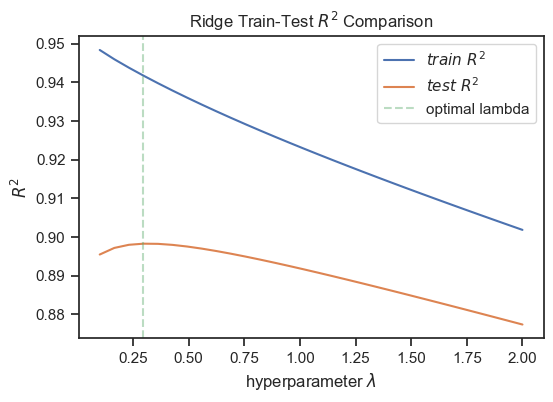

In [45]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
score_max = np.max(ridge_scores_test)
index = np.where(ridge_scores_test == score_max)
last_underfit  = alphas[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.savefig('./images/ridge.png', dpi=500)

In [46]:
alphas2 = np.linspace(0.00005,0.0010,50)
lasso = Lasso(normalize=True)
lasso_scores_train = []
lasso_scores_test  = []
for alpha in alphas2:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_d2_scaled_train, y_d2_train)
    lasso_scores_train.append(lasso.score(X_d2_scaled_train, y_d2_train))
    lasso_scores_test.append(lasso.score(X_d2_scaled_test, y_d2_test))

lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

In [47]:
score_max = np.max(lasso_scores_test)
print(score_max)
index = np.where(lasso_scores_test == score_max)
alphas2[index]

0.9000552604808034


array([0.00010816])

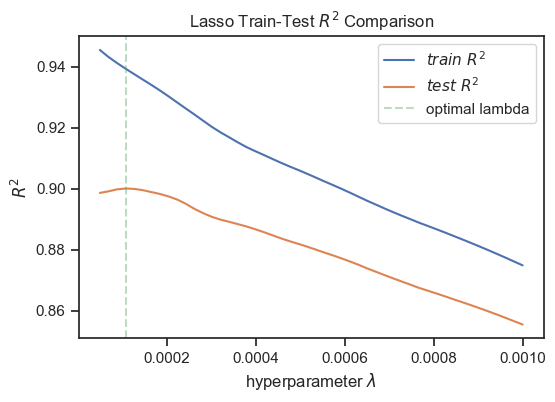

In [48]:
plt.plot(alphas2, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas2, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
score_max = np.max(lasso_scores_test)
index = np.where(lasso_scores_test == score_max)
last_underfit  = alphas2[index]
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')
plt.savefig('./images/lasso.png', dpi=500)

[Text(0, 0.5, ''), Text(0.5, 0, 'Feature Importance')]

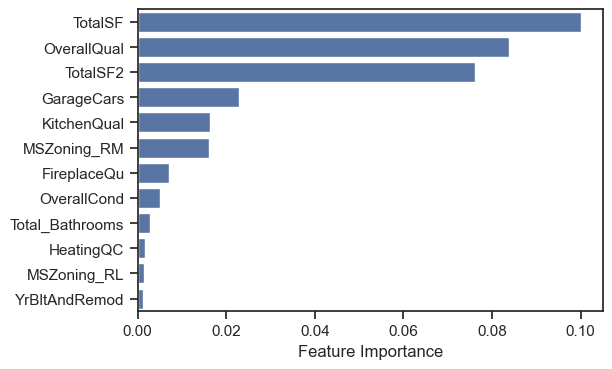

In [49]:
pd.options.display.max_rows = 30
coefficients = pd.concat([pd.DataFrame(X_d2_scaled_train.columns),
                          pd.DataFrame(np.transpose(abs(lasso.coef_)))], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:12], color="b")
ax.set(ylabel="",
       xlabel="Feature Importance")

### Random Forest

In [57]:
from sklearn import ensemble

randomForest = ensemble.RandomForestRegressor()

randomForest.set_params(random_state=0)

randomForest.fit(X_le_train, y_le_train) 

print("The training accuracy is: %.5f" % (randomForest.score(X_le_train, y_le_train)))
print("The test     accuracy is: %.5f" % (randomForest.score(X_le_test, y_le_test)))

The training accuracy is: 0.98409
The test     accuracy is: 0.87598


In [63]:
# set the parameter grid
import sklearn.model_selection as ms

randomForest.set_params(random_state = 0, max_features = 'sqrt')

grid_para_forest = {
    #'max_features' : ('sqrt', 'auto'),
    'max_depth': range(8, 18),
    'n_estimators': range(100, 160, 5)
}

# run the RF classifier through the grid search
grid_search_forest = ms.GridSearchCV(randomForest, grid_para_forest, cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_le_train, y_le_train)


# get the best parameters
print(grid_search_forest.best_params_)

# get the best score
print(grid_search_forest.best_score_)

# get the training/test errors
print("The training accuracy is: %.5f" % (grid_search_forest.best_estimator_.score(X_le_train, y_le_train)))
print("The test     accuracy is: %.5f" % (grid_search_forest.best_estimator_.score(X_le_test, y_le_test)))

Wall time: 38.6 s
{'max_depth': 15, 'n_estimators': 125}
0.8836035564178356
The training accuracy is: 0.98376
The test     accuracy is: 0.89164


[Text(0, 0.5, ''), Text(0.5, 0, 'Feature Importance')]

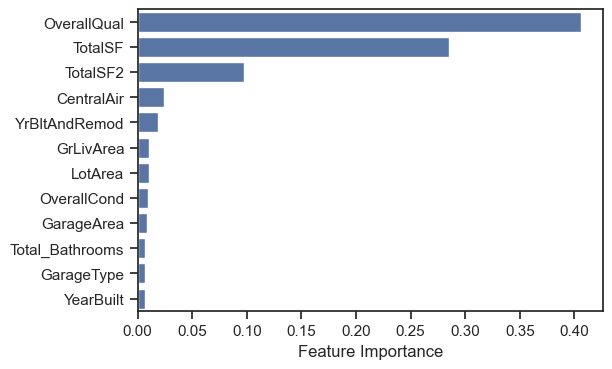

In [59]:
coefficients = pd.concat([pd.DataFrame(X_le_train.columns),
                          pd.DataFrame(randomForest.feature_importances_)], axis = 1)
coefficients.columns = ('features', 'coefs')
coefficients = coefficients.sort_values(by='coefs',ascending=False)
f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(x="coefs", y="features", data=coefficients[0:12], color="b")
ax.set(ylabel="",
       xlabel="Feature Importance")

### XGBoost

In [ ]:
from xgboost import XGBRegressor
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

params = {
        'min_child_weight': [0, 1, 5],
        'gamma': [0, 0.5, 1, 1.5, 2],
        'subsample': [0.5, 0.7, 1.0],
        'colsample_bytree': [0.5, 0.7, 1.0],
        'max_depth': [2, 3, 4]
        }

xgb = XGBRegressor(learning_rate=0.01,n_estimators=3460, objective='reg:linear', nthread=-1,
                       scale_pos_weight=1, seed=27, reg_alpha=0.00006)

param_comb = 10

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=10, random_state=11 )

%time random_search.fit(X_le_train, y_le_train, eval_set=[(X_le_test, y_le_test)])

print('\n Best estimator:')
print(random_search.best_estimator_)

scores = cross_val_score(random_search, X_le_train, y_le_train, scoring='r2', cv=5, n_jobs=-1)
print(scores)